# Laplacian Renormalization Group (LGR)
## In a nutshell

In [3]:
import sys; sys.path.insert(0, "..")
from multifunbrain import *
#
flag_path = False
if not flag_path:
    path_root = Path.cwd().parent
    path_data =  path_root / Path("data")
    #
    os.chdir(path_root)
    flag_path = True

## Multiscale Graph Spectral Analysis

### With 2 scales graph
- generate a multiscale graph with `multifunbrain.generate_multiscale_graph`.
- compute laplacian matrix $L$ and spectrum $\sigma(L)$
- draw the graph

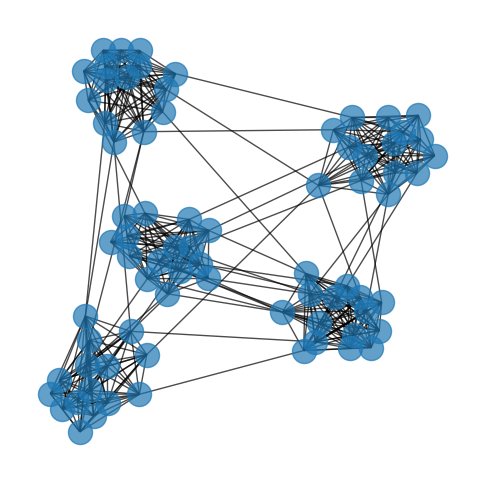

In [17]:
# generate a multiscale graph
G = generate_multiscale_graph(n_clusters=5, cluster_size=15, p_in=0.9, p_out=0.02, seed=42)
pos = nx.spring_layout(G, seed=42)
# compute the Laplacian spectrum
L = nx.laplacian_matrix(G).todense()
spectrum = nx.laplacian_spectrum(G)
#
fig, ax = plt.subplots(figsize=(6, 6))
nx.draw(G, pos, with_labels=False, alpha=0.7)

Define the density matrix $\rho$ at time $\tau$ and compute the Entropy $S$ and specific heat $C$
$$
\rho(\tau) = \frac{e^{-\tau L}}{\mathrm{Tr}(e^{-\tau L})}, \qquad S = \mathrm{Tr}[\rho\log\rho], \qquad C = \frac{\mathrm{d}S}{\mathrm{d}(\log\tau)}
$$

In [18]:
rho_m = lambda tau: rho_matrix(tau, L)
Sm1, Csp, VarL, t = entropy(spectrum, steps=600, t1=-2, t2=5)

/home/opisthofulax/Documents/UniPa/projects/multifun-brain/notebooks/../multifunbrain/lrglib.py:53: RuntimeWarning:

divide by zero encountered in log

/home/opisthofulax/Documents/UniPa/projects/multifun-brain/notebooks/../multifunbrain/lrglib.py:53: RuntimeWarning:

invalid value encountered in multiply



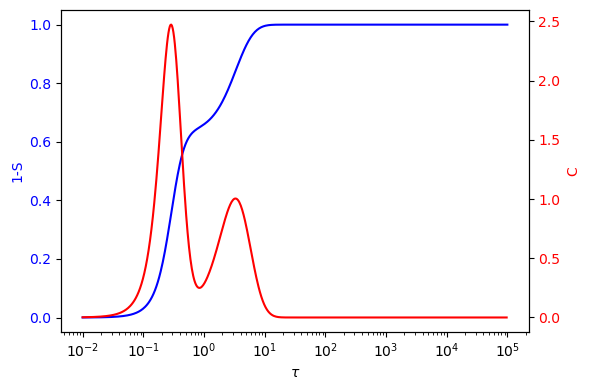

In [19]:
fig, ax1 = plt.subplots(figsize=(6, 4))
#
color1 = "blue"
color2 = "red"
#
ax1.plot(t, Sm1, label=r"$1-S$", color=color1)
ax1.set_ylabel("1-S", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xscale('log')
ax2 = ax1.twinx()
ax2.plot(t[:-1], Csp, label=r"$C$", color=color2)
ax2.set_ylabel("C", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax1.set_xlabel(r"$\tau$")
#
fig.tight_layout()

In [20]:
tau = 1 / max(spectrum)
#
dists = symmetrized_inverse_distance(tau, rho_m)
linkage_matrix, label_list, tmax = compute_normalized_linkage(dists, G, method='ward')

In [27]:
threshold = 0.01
optimal_clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

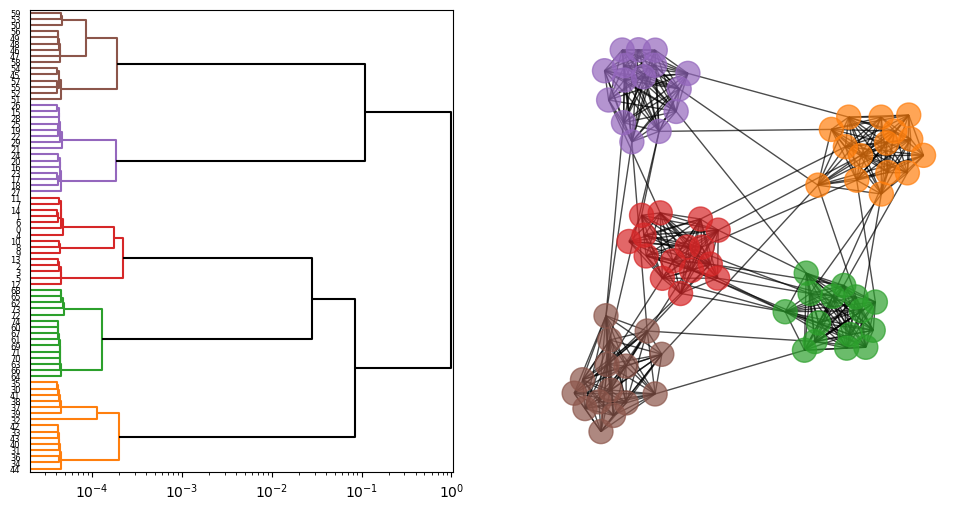

In [28]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
#
tmin = linkage_matrix[::, 2][0] - 0.5*linkage_matrix[::, 2][0]
dendro = dendrogram(linkage_matrix, ax=ax[0], 
                    color_threshold=threshold,
                    above_threshold_color='k',
                    orientation='right')
leaf_label_colors = {label: color for label, color in zip(dendro['ivl'], dendro['leaves_color_list'])}
node_colors = [leaf_label_colors[str(label)] for label in label_list]
ax[0].set_xscale('log')
ax[0].set_xlim(tmin)
nx.draw(G, pos=pos, ax=ax[1], node_color=node_colors, alpha=0.7)

### With timeseries

In [4]:
ts = np.loadtxt(path_data / "HarvardOxford_48Parcels.ts.1D").T
G, remnodes = build_correlation_network(ts)

/home/opisthofulax/anaconda3/envs/multifun-brain/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/opisthofulax/anaconda3/envs/multifun-brain/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


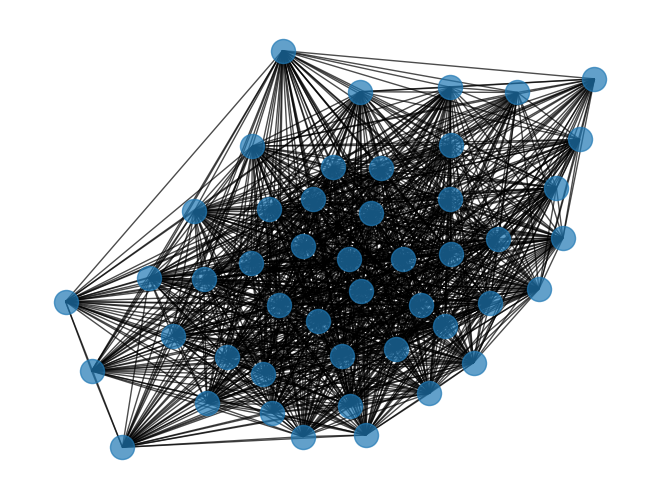

In [5]:
nx.draw(G, with_labels=False, alpha=0.7)

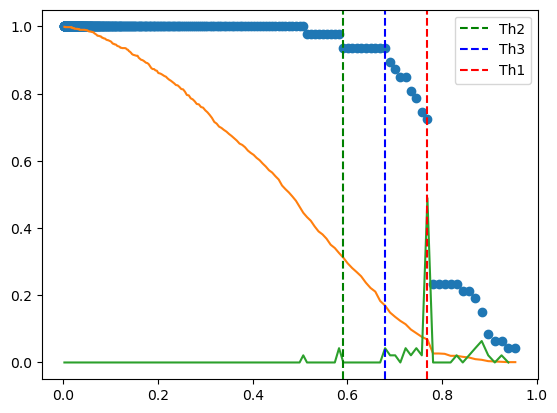

In [6]:
Th, Einf, Pinf = compute_threshold_stats(G)
#
Th1 = select_threshold_elbow(Th, Pinf)
Th2 = select_threshold_fraction(Th, Pinf)
Th3 = select_threshold_plateau(Th, Pinf, tol=0.07)
#
plt.plot(Th, Pinf, 'o')
plt.plot(Th, Einf)
plt.plot(Th[:-1], -np.diff(Pinf))
plt.axvline(x=Th2, color='g', linestyle='--', label="Th2")
plt.axvline(x=Th3, color='b', linestyle='--', label="Th3")
plt.axvline(x=Th1, color='r', linestyle='--', label="Th1")
plt.legend()

In [27]:
G, remnodes = build_correlation_network(ts, threshold=0.68)
print(remnodes)

[9, 34, 37, 33]


/home/opisthofulax/anaconda3/envs/multifun-brain/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning:

invalid value encountered in divide

/home/opisthofulax/anaconda3/envs/multifun-brain/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning:

invalid value encountered in divide



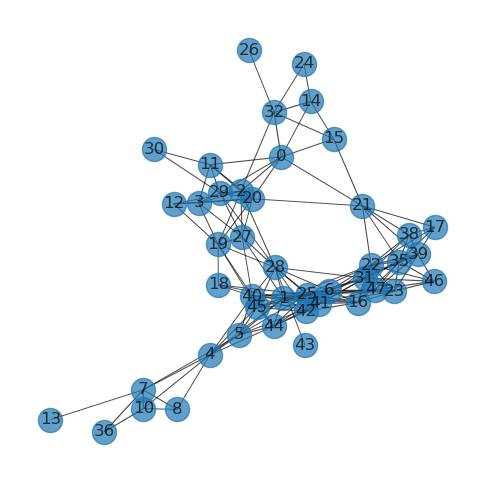

In [28]:
L = nx.laplacian_matrix(G).todense()
spectrum = nx.laplacian_spectrum(G)
#
fig, ax = plt.subplots(figsize=(6, 6))
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, with_labels=True, alpha=0.7, width=weights)

In [29]:
rho_m = lambda tau: rho_matrix(tau, L)
Sm1, Csp, VarL, t = entropy(spectrum)

/home/opisthofulax/Documents/UniPa/projects/multifun-brain/notebooks/../multifunbrain/lrglib.py:53: RuntimeWarning:

divide by zero encountered in log

/home/opisthofulax/Documents/UniPa/projects/multifun-brain/notebooks/../multifunbrain/lrglib.py:53: RuntimeWarning:

invalid value encountered in multiply



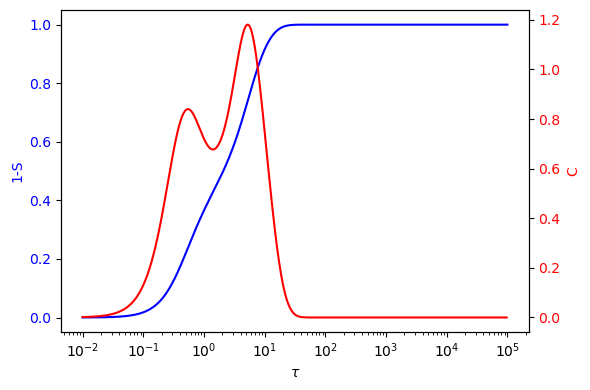

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))
#
plot_entropy_and_C(ax, t, Sm1, Csp, color1="blue", color2="red")
fig.tight_layout()

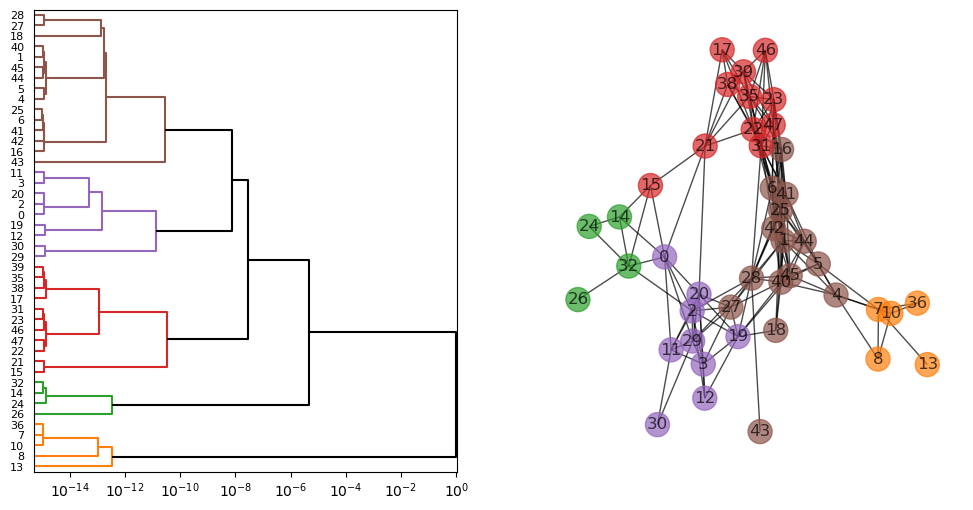

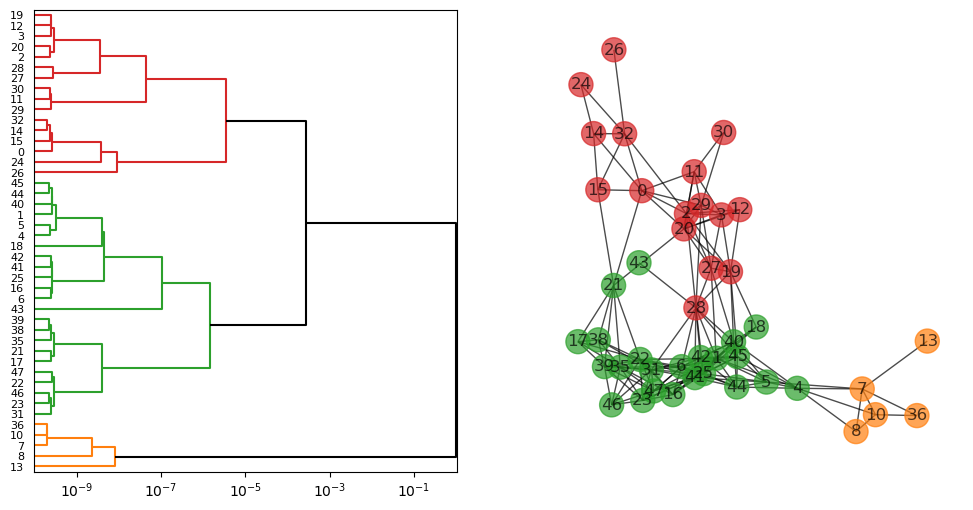

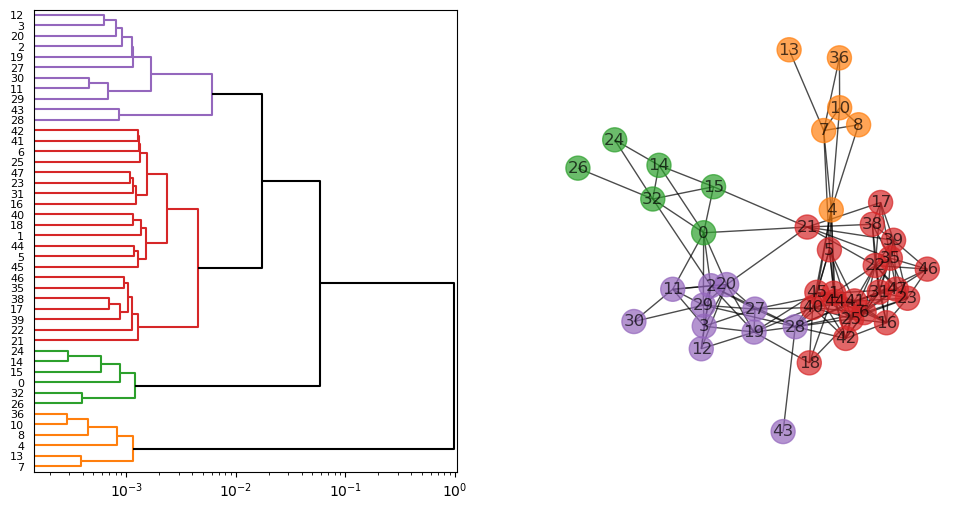

In [31]:
partitions = []
tau_values = [1/100, 1/max(spectrum), 1]  # Example τ values for different stages.
thresholds = [1e-9, 1e-5, 1e-2]  # Example thresholds for different stages.
# Sample usage (replace these example partitions with your own computed clusters):
for i,tau in enumerate(tau_values):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
    dists = symmetrized_inverse_distance(tau, rho_m)
    linkage_matrix, label_list, tmax = compute_normalized_linkage(dists, G, method='ward')
    #
    merge_distances = linkage_matrix[:, 2]
    
    threshold = thresholds[i]
    # threshold = thresholds[i]
    tmin = linkage_matrix[::, 2][0] - 0.5*linkage_matrix[::, 2][0]
    optimal_clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')
    partitions.append(optimal_clusters)

    dendro = dendrogram(linkage_matrix, ax=ax[0], 
                        color_threshold=threshold,
                        above_threshold_color='k',
                        orientation='right', labels=label_list)
    leaf_label_colors = {label: color for label, color in zip(dendro['ivl'], dendro['leaves_color_list'])}
    node_colors = [leaf_label_colors[label] for _,label in enumerate(label_list)]
    ax[0].set_xscale('log')
    ax[0].set_xlim(tmin)
    nx.draw(G, ax=ax[1], node_color=node_colors, with_labels=True, alpha=0.7)

In [20]:
# Example for a network with 10 nodes and 3 τ time scales.
plot_sankey(partitions, tau_values)
partdict_tau = identify_switching_nodes(partitions, tau_values)

In [16]:
get_moved_nodes_interval(partdict_tau, 2, tau_i=tau_values[1], tau_f=tau_values[2])

{1: {'tau_i_cluster': 2,
  'tau_f_cluster': 3,
  'history': [(0.01, 3), (0.07485407993726223, 2), (1.0, 3)]},
 4: {'tau_i_cluster': 2,
  'tau_f_cluster': 1,
  'history': [(0.01, 3), (0.07485407993726223, 2), (1.0, 1)]},
 5: {'tau_i_cluster': 2,
  'tau_f_cluster': 3,
  'history': [(0.01, 3), (0.07485407993726223, 2), (1.0, 3)]},
 6: {'tau_i_cluster': 2,
  'tau_f_cluster': 3,
  'history': [(0.01, 3), (0.07485407993726223, 2), (1.0, 3)]},
 15: {'tau_i_cluster': 2,
  'tau_f_cluster': 3,
  'history': [(0.01, 3), (0.07485407993726223, 2), (1.0, 3)]},
 16: {'tau_i_cluster': 2,
  'tau_f_cluster': 3,
  'history': [(0.01, 3), (0.07485407993726223, 2), (1.0, 3)]},
 17: {'tau_i_cluster': 2,
  'tau_f_cluster': 3,
  'history': [(0.01, 3), (0.07485407993726223, 2), (1.0, 3)]},
 20: {'tau_i_cluster': 2,
  'tau_f_cluster': 3,
  'history': [(0.01, 3), (0.07485407993726223, 2), (1.0, 3)]},
 21: {'tau_i_cluster': 2,
  'tau_f_cluster': 3,
  'history': [(0.01, 3), (0.07485407993726223, 2), (1.0, 3)]},
 22: 